# Temporal Route Patterns - Analysis

In [112]:
#imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import xgboost as xgb
from sklearn.metrics import mean_squared_error as MSE
color_pal = sns.color_palette()
plt.style.use('fivethirtyeight')


In [2]:
def download_link(url):
  '''Method reformates the share link from Google Drive into fetchable form'''
  return 'https://drive.google.com/uc?id=' + url.split('/')[-2]

In [117]:
# Cycling data
cycling_data = pd.read_csv(download_link("https://drive.google.com/file/d/15eHai6zkPwOBMq59n8uIjjohuuiaV8DF/view?usp=sharing"))


In [125]:
cycling_data["DATUM_A_CAS"] = pd.to_datetime(cycling_data["DATUM_A_CAS"], errors="coerce")
cycling_data["POCET_DOKOPY"] = cycling_data["POCET_DO"] + cycling_data["POCET_Z"]

In [126]:
cycling_data.sort_values(by="DATUM_A_CAS", inplace=True)

In [127]:
cycling_data.head()

,NAZOV,ZEMEPISNA_SIRKA,ZEMEPISNA_DLZKA,SMER_DO,SMER_Z,DATUM_A_CAS,POCET_DO,POCET_Z,ObjectId,POCET_DOKOPY
260280,Cyklomost Slobody,48.21065,16.969,Cyklomost Slobody Pedestrians IN - na Slovensko,Cyklomost Slobody Pedestrians OUT - zo Slovenska,2014-07-18 07:00:00+00:00,0,0,260281,0
260283,Cyklomost Slobody,48.21065,16.969,Cyklomost Slobody Pedestrians IN - na Slovensko,Cyklomost Slobody Pedestrians OUT - zo Slovenska,2014-07-18 08:00:00+00:00,0,0,260284,0
260286,Cyklomost Slobody,48.21065,16.969,Cyklomost Slobody Pedestrians IN - na Slovensko,Cyklomost Slobody Pedestrians OUT - zo Slovenska,2014-07-18 09:00:00+00:00,0,0,260287,0
260289,Cyklomost Slobody,48.21065,16.969,Cyklomost Slobody Pedestrians IN - na Slovensko,Cyklomost Slobody Pedestrians OUT - zo Slovenska,2014-07-18 10:00:00+00:00,0,0,260290,0
260292,Cyklomost Slobody,48.21065,16.969,Cyklomost Slobody Pedestrians IN - na Slovensko,Cyklomost Slobody Pedestrians OUT - zo Slovenska,2014-07-18 11:00:00+00:00,0,0,260293,0


In [128]:
cycling_data['NAZOV'].value_counts()

NAZOV
Cyklomost Slobody            95031
Hradza Berg                  93837
Viedenska                    93745
Devinska Nova Ves            52273
#4 - Dolnozemská             28822
#3 - River Park              28820
#1 - Starý Most              28794
#8 - Most SNP                24810
#9 - Páričkova               24807
#6 - Vajnorská               24806
#10 - Dunajská               24382
#12 - Železná studnička      24376
#2 - Starý most 2            23880
#7 - Vajnorská > NTC         23528
#5 - Devínska cesta          23188
#11 - Most Apollo            20467
#14 - Vajanského 2           16563
#13 - Vajanského 1           16551
#17 - Dunajská/Lazaretská     7500
#15 - Incheba Einsteinova     7498
#16 - Trenčianska             7498
Name: count, dtype: int64

In [129]:
cyklomost_slobody = cycling_data[cycling_data['NAZOV'] == 'Cyklomost Slobody']
cyklomost_slobody.head()

,NAZOV,ZEMEPISNA_SIRKA,ZEMEPISNA_DLZKA,SMER_DO,SMER_Z,DATUM_A_CAS,POCET_DO,POCET_Z,ObjectId,POCET_DOKOPY
260280,Cyklomost Slobody,48.21065,16.969,Cyklomost Slobody Pedestrians IN - na Slovensko,Cyklomost Slobody Pedestrians OUT - zo Slovenska,2014-07-18 07:00:00+00:00,0,0,260281,0
260283,Cyklomost Slobody,48.21065,16.969,Cyklomost Slobody Pedestrians IN - na Slovensko,Cyklomost Slobody Pedestrians OUT - zo Slovenska,2014-07-18 08:00:00+00:00,0,0,260284,0
260286,Cyklomost Slobody,48.21065,16.969,Cyklomost Slobody Pedestrians IN - na Slovensko,Cyklomost Slobody Pedestrians OUT - zo Slovenska,2014-07-18 09:00:00+00:00,0,0,260287,0
260289,Cyklomost Slobody,48.21065,16.969,Cyklomost Slobody Pedestrians IN - na Slovensko,Cyklomost Slobody Pedestrians OUT - zo Slovenska,2014-07-18 10:00:00+00:00,0,0,260290,0
260292,Cyklomost Slobody,48.21065,16.969,Cyklomost Slobody Pedestrians IN - na Slovensko,Cyklomost Slobody Pedestrians OUT - zo Slovenska,2014-07-18 11:00:00+00:00,0,0,260293,0


In [130]:
cyklomost_slobody.describe()

,ZEMEPISNA_SIRKA,ZEMEPISNA_DLZKA,POCET_DO,POCET_Z,ObjectId,POCET_DOKOPY
count,9.503100e+04,9.503100e+04,95031.000000,95031.000000,95031.000000,95031.000000
mean,4.821065e+01,1.696900e+01,6.951679,5.740706,324339.808841,12.692385
std,1.421093e-14,3.552732e-15,15.477178,12.745327,82022.093347,26.680831
min,4.821065e+01,1.696900e+01,0.000000,0.000000,260024.000000,0.000000
25%,4.821065e+01,1.696900e+01,0.000000,0.000000,283830.500000,0.000000
50%,4.821065e+01,1.696900e+01,1.000000,1.000000,307588.000000,1.000000
75%,4.821065e+01,1.696900e+01,6.000000,5.000000,331345.500000,12.000000
max,4.821065e+01,1.696900e+01,267.000000,279.000000,691152.000000,335.000000


In [131]:
df = cyklomost_slobody
cols = ['DATUM_A_CAS', 'POCET_DOKOPY']
df = df[cols]
df.set_index('DATUM_A_CAS', inplace=True)

<Axes: title={'center': 'Cyklomost Slobody - počet cyklistov v čase'}, xlabel='DATUM_A_CAS'>

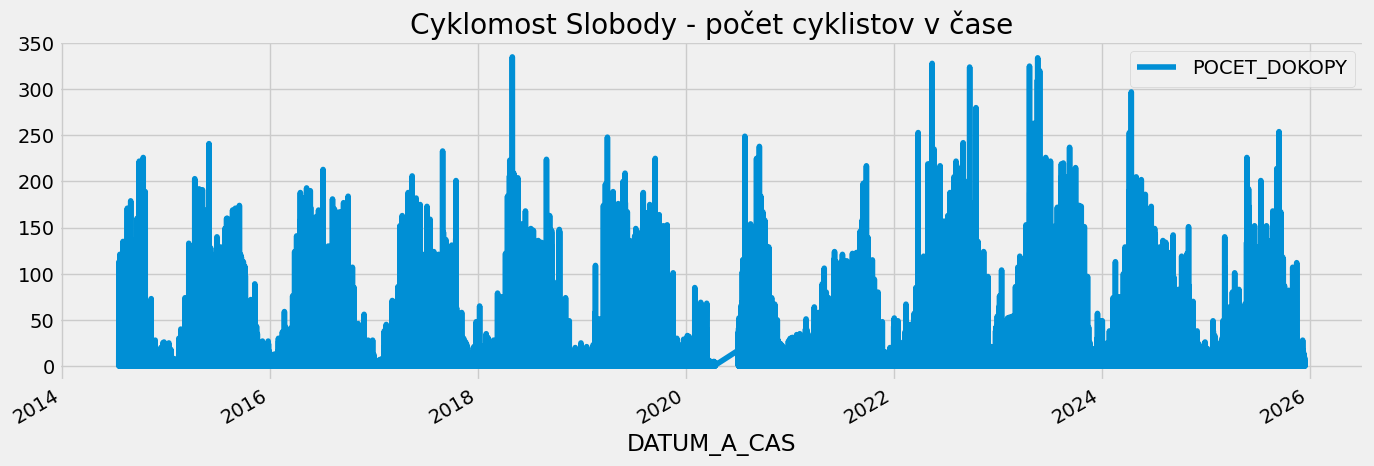

In [132]:
df.plot(style='-', figsize=(15,5), 
        color=color_pal[0], 
        title='Cyklomost Slobody - počet cyklistov v čase')


## Train/Test Split

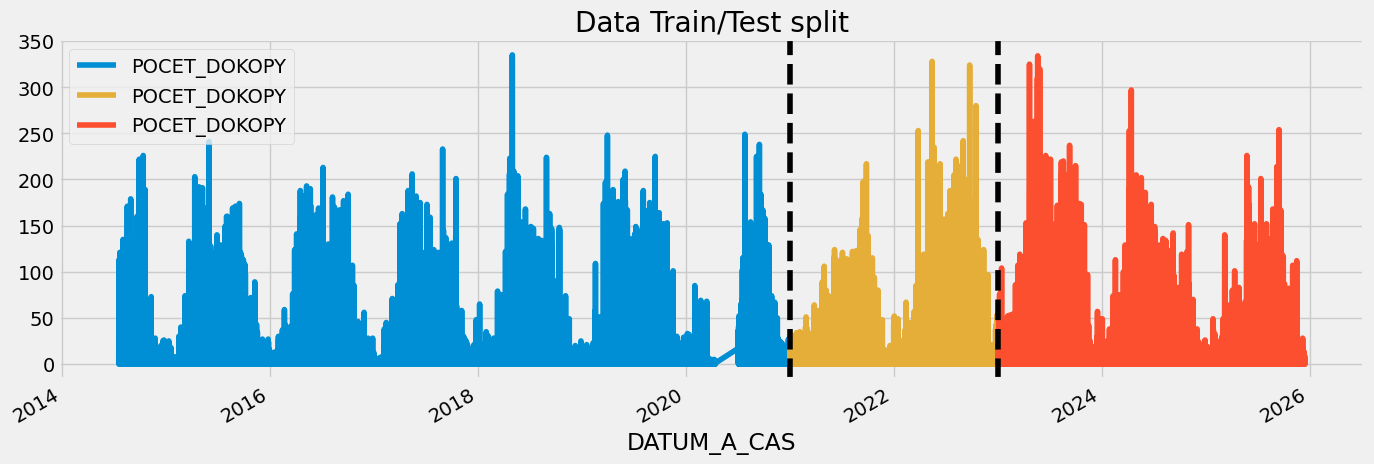

In [135]:
train = df.loc[df.index < '2021-01-01']
val = df.loc[(df.index >= '2021-01-01') & (df.index < '2023-01-01')]
test = df.loc[df.index >= '2023-01-01']

fig, ax = plt.subplots(figsize=(15,5))
train.plot(ax = ax, label='Train data', color=color_pal[0], title='Data Train/Test split')
val.plot(ax = ax, label='Validation data', color=color_pal[2])
test.plot(ax = ax, label='Test data', color=color_pal[1])
ax.axvline('2021-01-01', color='black', linestyle='--')
ax.axvline('2023-01-01', color='black', linestyle='--')
plt.show()

<Axes: title={'center': 'Cyklomost Slobody - počet cyklistov (1 týždeň v januári 2018)'}, xlabel='DATUM_A_CAS'>

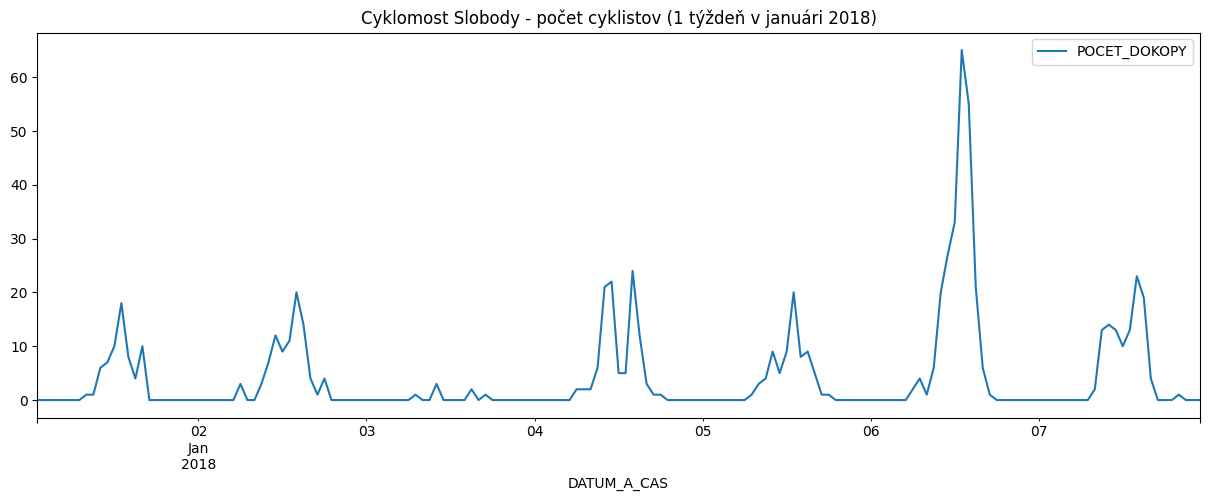

In [58]:
df.loc[(df.index > '2018-01-01') & (df.index < '2018-01-08')].plot(figsize=(15,5), title='Cyklomost Slobody - počet cyklistov (1 týždeň v januári 2018)')


In [78]:
def create_features(df):
    """Create time series features based on time index."""
    df = df.copy()
    df['hour'] = df.index.hour
    df['dayofweek'] = df.index.dayofweek
    df['quarter'] = df.index.quarter
    df['month'] = df.index.month
    df['year'] = df.index.year
    df['dayofyear'] = df.index.dayofyear
    return df



In [136]:
df = create_features(df)
df.head()

,POCET_DOKOPY,hour,dayofweek,quarter,month,year,dayofyear
DATUM_A_CAS,,,,,,,
2014-07-18 07:00:00+00:00,0,7,4,3,7,2014,199
2014-07-18 08:00:00+00:00,0,8,4,3,7,2014,199
2014-07-18 09:00:00+00:00,0,9,4,3,7,2014,199
2014-07-18 10:00:00+00:00,0,10,4,3,7,2014,199
2014-07-18 11:00:00+00:00,0,11,4,3,7,2014,199


### Visualize our Feature/Target Relationship

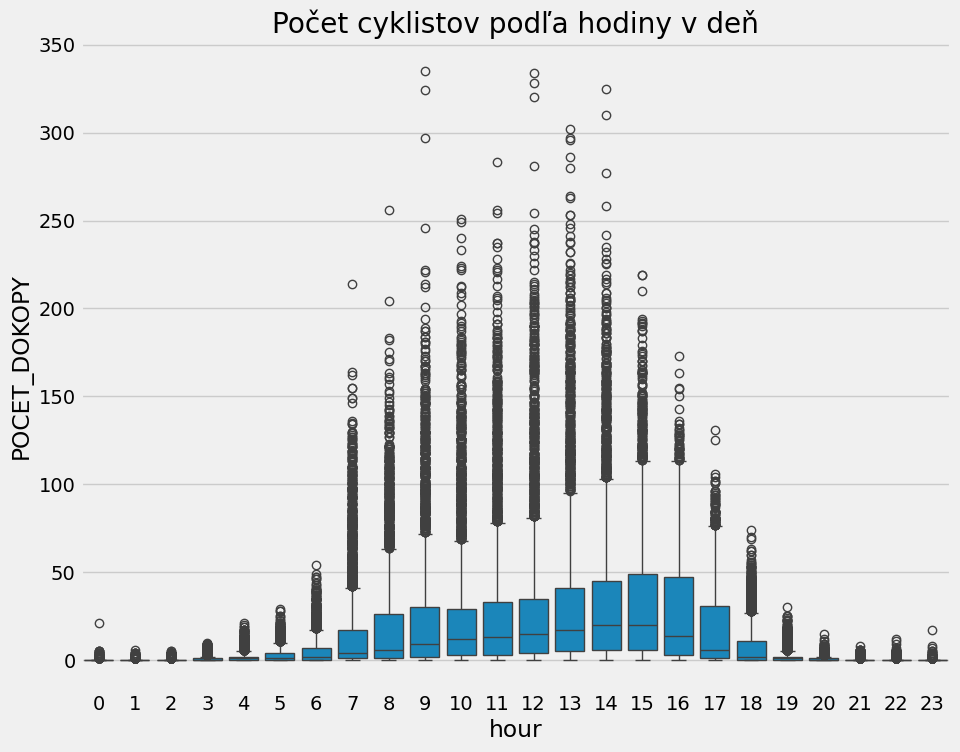

In [76]:
fix, ax = plt.subplots(figsize=(10,8))
sns.boxplot(data = df, x='hour', y='POCET_DOKOPY')
ax.set_title('Počet cyklistov podľa hodiny v deň')
plt.show()

Text(0.5, 1.0, 'Počet cyklistov podľa mesiaca v roku')

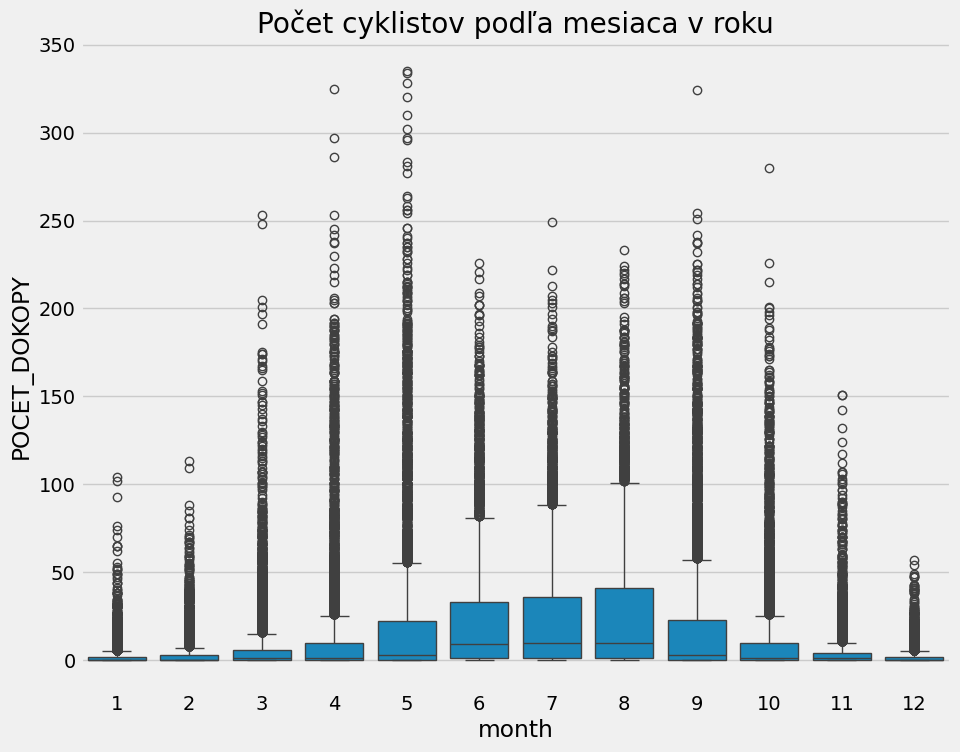

In [137]:
fix, ax = plt.subplots(figsize=(10,8))
sns.boxplot(data = df, x='month', y='POCET_DOKOPY')
ax.set_title('Počet cyklistov podľa mesiaca v roku')

## Model

In [138]:
train = create_features(train)
val = create_features(val)
test = create_features(test)

In [139]:
FEATURES = ['hour', 'dayofweek', 'quarter', 'month', 'year', 'dayofyear']
# add holydais later
TARGET = 'POCET_DOKOPY'

In [140]:
X_train = train[FEATURES]
y_train = train[TARGET]

X_val = val[FEATURES]
y_val = val[TARGET]

X_test = test[FEATURES]
y_test = test[TARGET]

In [141]:
results = []

In [142]:
for n_estimators in [500, 1000, 2000, 5000]:
    for learning_rate in [0.01, 0.05, 0.1]:
        reg = xgb.XGBRegressor(n_estimators = n_estimators, early_stopping_rounds = 100, learning_rate = learning_rate)
        reg.fit(X_train, y_train,
                eval_set = [(X_train, y_train), (X_val, y_val)],
                verbose=True)
        
        
        results.append({
                'n_estimators': n_estimators,
                'learning_rate': learning_rate,
                'model': reg,
                'best_val_score': reg.best_score
            })

[0]	validation_0-rmse:25.03362	validation_1-rmse:26.84117
[1]	validation_0-rmse:24.90365	validation_1-rmse:26.71510
[2]	validation_0-rmse:24.77558	validation_1-rmse:26.59073
[3]	validation_0-rmse:24.64931	validation_1-rmse:26.46800
[4]	validation_0-rmse:24.52491	validation_1-rmse:26.34693
[5]	validation_0-rmse:24.40237	validation_1-rmse:26.22784
[6]	validation_0-rmse:24.28165	validation_1-rmse:26.11037
[7]	validation_0-rmse:24.16280	validation_1-rmse:25.99510
[8]	validation_0-rmse:24.04597	validation_1-rmse:25.88124
[9]	validation_0-rmse:23.93057	validation_1-rmse:25.76911
[10]	validation_0-rmse:23.81690	validation_1-rmse:25.65845
[11]	validation_0-rmse:23.70495	validation_1-rmse:25.54968
[12]	validation_0-rmse:23.59524	validation_1-rmse:25.44252
[13]	validation_0-rmse:23.48664	validation_1-rmse:25.33707
[14]	validation_0-rmse:23.37916	validation_1-rmse:25.23268
[15]	validation_0-rmse:23.27330	validation_1-rmse:25.12961
[16]	validation_0-rmse:23.16944	validation_1-rmse:25.02852
[17]	va

In [144]:
results_df = pd.DataFrame(results).sort_values(by='best_val_score')
results_df.head()

,n_estimators,learning_rate,model,best_val_score
0,500,0.01,"XGBRegressor(base_score=None, booster=None, ca...",17.537292
3,1000,0.01,"XGBRegressor(base_score=None, booster=None, ca...",17.537292
6,2000,0.01,"XGBRegressor(base_score=None, booster=None, ca...",17.537292
9,5000,0.01,"XGBRegressor(base_score=None, booster=None, ca...",17.537292
7,2000,0.05,"XGBRegressor(base_score=None, booster=None, ca...",17.607184


In [146]:
best_result = min(results, key=lambda x: x['best_val_score'])  # For RMSE, lower is better

print("Best parameters:")
print(f"n_estimators: {best_result['n_estimators']}")
print(f"learning_rate: {best_result['learning_rate']}")
print(f"Best validation score: {best_result['best_val_score']}")

best_model = best_result['model']

Best parameters:
n_estimators: 500
learning_rate: 0.01
Best validation score: 17.53729235516336


<Axes: title={'center': 'Feature Importance'}>

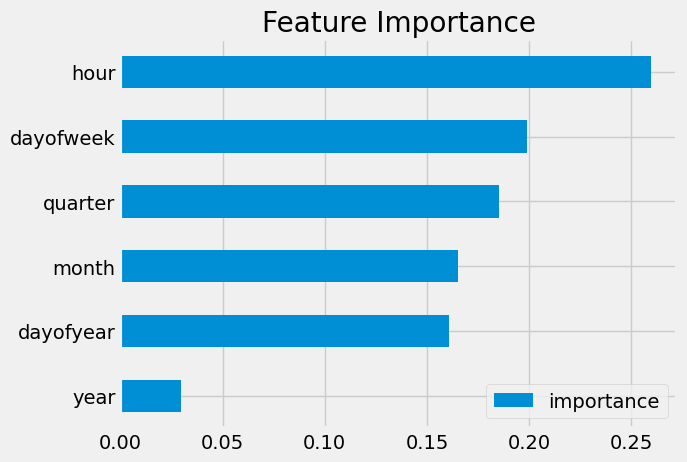

In [147]:
fi = pd.DataFrame(data = best_model.feature_importances_,
             index = best_model.feature_names_in_,
             columns=['importance']).sort_values(by='importance', ascending=False)

fi.sort_values('importance').plot(kind='barh',  title='Feature Importance')

## Forecast on Test

In [148]:
n_estimators = best_result['n_estimators']
learning_rate = best_result['learning_rate']

reg = xgb.XGBRegressor(n_estimators = n_estimators, learning_rate = learning_rate)
reg.fit(pd.concat([X_train, X_val]), pd.concat([y_train, y_val]))

y_pred = reg.predict(X_test)
mse = MSE(y_test, y_pred)

In [149]:
mse

377.4595642089844

In [150]:
test['prediction'] = reg.predict(X_test)

In [151]:
df = df.merge(test[['prediction']], how='left', left_index=True, right_index=True)

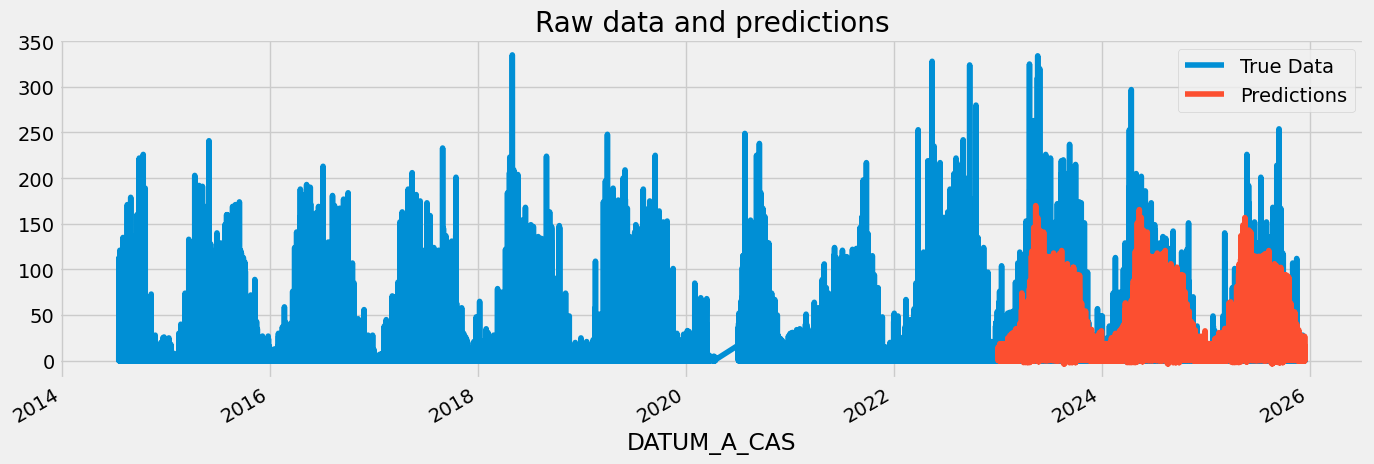

In [152]:
ax = df[['POCET_DOKOPY']].plot(figsize=(15,5))
df['prediction'].plot(ax=ax, style='-')
plt.legend(['True Data', 'Predictions'])
ax.set_title('Raw data and predictions')
plt.show()

In [156]:
np.sqrt(MSE(y_test, test['prediction']))
print("RMSE:", np.sqrt(MSE(y_test, test['prediction'])))

RMSE: 19.42831861507795


In [ ]:
# TODO: pre všetky trasy